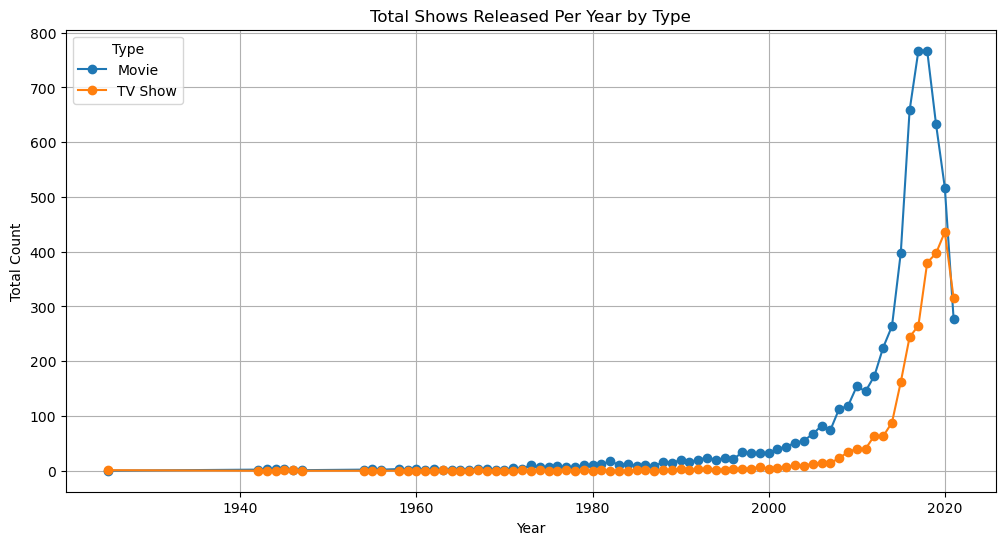

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Total Show Released Per Year By Its Type
# Dataset
data = pd.read_csv("netflix_titles.csv")

# Group year
years = sorted(data["release_year"].dropna().unique())

# Count total 
stats_year = data.groupby(["release_year", "type"]).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
for t in stats_year.columns:
    plt.plot(stats_year.index, stats_year[t], marker="o", label=t)
# Line Chart
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Total Shows Released Per Year by Type")
plt.legend(title="Type")
plt.grid(True)
plt.show()